In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Load the data set

In [4]:
df = pd.read_csv('Dataset/dataset.csv')


# Step 2: Tidy dataset by dropping irrelevant columns

In [5]:
# Droping irrelevant columns
df.drop(columns=['index',"on_mouseover", "RightClick", "popUpWidnow", "Iframe"], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target

In [6]:
#Display the first 5 rows of the dataset
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Abnormal_URL,Redirect,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,0,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,0,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,0,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,0,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,0,-1,-1,0,-1,1,1,1,1


In [7]:
# Handle missing values
X.fillna(X.median(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [9]:
df.max(axis=0)

having_IPhaving_IP_Address     1
URLURL_Length                  1
Shortining_Service             1
having_At_Symbol               1
double_slash_redirecting       1
Prefix_Suffix                  1
having_Sub_Domain              1
SSLfinal_State                 1
Domain_registeration_length    1
Favicon                        1
port                           1
HTTPS_token                    1
Request_URL                    1
URL_of_Anchor                  1
Links_in_tags                  1
SFH                            1
Submitting_to_email            1
Abnormal_URL                   1
Redirect                       1
age_of_domain                  1
DNSRecord                      1
web_traffic                    1
Page_Rank                      1
Google_Index                   1
Links_pointing_to_page         1
Statistical_report             1
Result                         1
dtype: int64

In [10]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Step 3: Splitting the data into test train sets

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [12]:
# Define parameter grid
param_grid = {
    'max_depth': [8, 10, 12, 15, 20],
    'n_estimators': [200, 300],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [13]:

# Initialize RandomForest Model 
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [14]:
# Perform Grid Search
from sklearn.model_selection import GridSearchCV


# # Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get Best Parameters and Best Accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train The model with best params

In [15]:
# Train the model with best parameters
best_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [16]:
# Make Predictions
y_pred = best_model.predict(X_test)


# Step 4: Evaluate model

In [17]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Final Test Accuracy: 0.9760
              precision    recall  f1-score   support

          -1       0.98      0.97      0.98      1204
           1       0.97      0.98      0.98      1259

    accuracy                           0.98      2463
   macro avg       0.98      0.98      0.98      2463
weighted avg       0.98      0.98      0.98      2463



In [18]:
import joblib
joblib.dump(best_model, 'Trained_Models/Final_Grid_model3_IMP.pkl')
print("Model Trained and Saved")

Model Trained and Saved


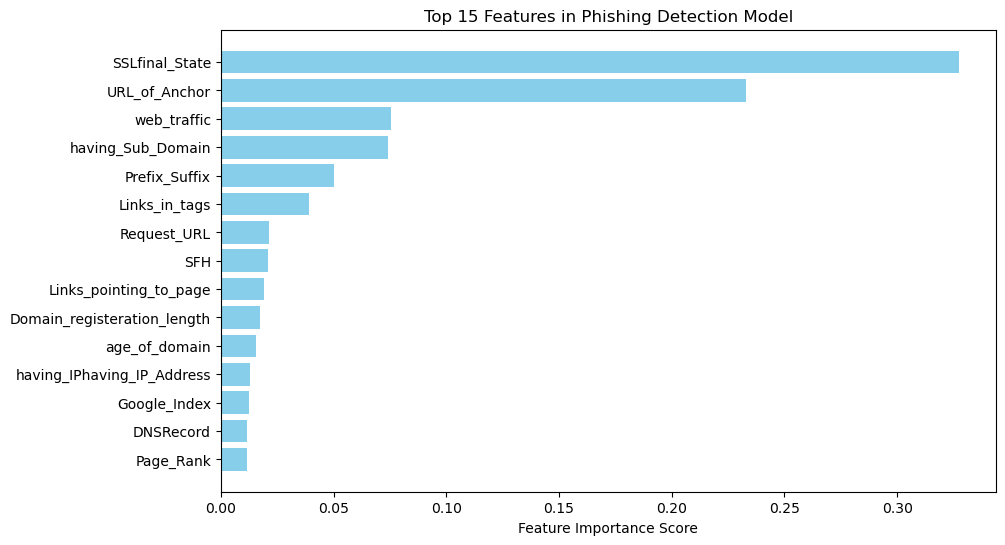

In [19]:
# Feature Importance Visualization
feature_importance = best_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center", color="skyblue")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Features in Phishing Detection Model")
plt.show()

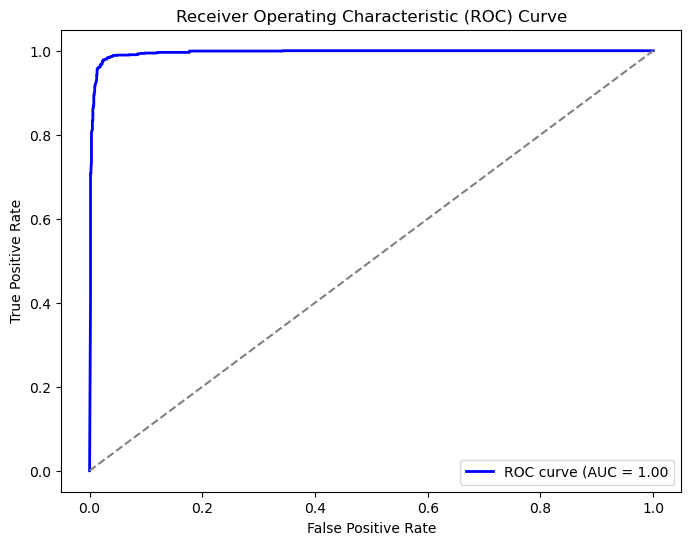

In [20]:
# ROC Curve
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities for phishing class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

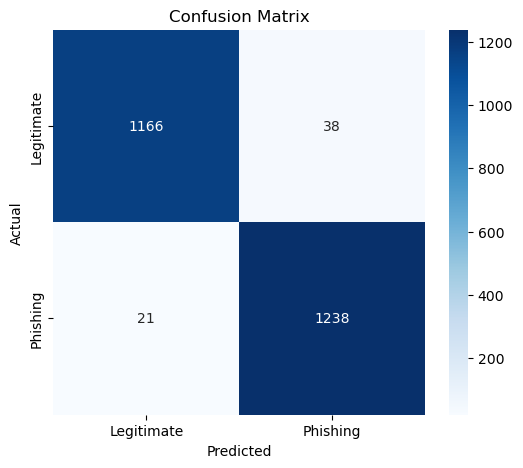

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [22]:
print(df['Result'].value_counts())


Result
 1    6157
-1    4898
Name: count, dtype: int64
